In [ ]:
#Check if the dataset contains NaN

In [2]:
import pandas as pd

# Define the path to your CSV file
dataFile = '/Users/jianpingzhou/work/Papers/Ongoing/Appendix/Tables/export_Tibet_Geochem copy.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(dataFile)

# Check for NaN values in the entire DataFrame
if df.isnull().values.any():
    print("The CSV file contains NaN values.")
    
    # Print columns with NaN values
    columns_with_nan = df.columns[df.isnull().any()].tolist()
    print("Columns with NaN values:", columns_with_nan)

    # Print rows with NaN values
    rows_with_nan = df[df.isnull().any(axis=1)]
    print("Rows with NaN values:")
    print(rows_with_nan)
else:
    print("The CSV file does not contain NaN values.")

The CSV file does not contain NaN values.


In [ ]:
#training Data input

In [1]:
import numpy as np
import pandas as pd

dataFile = '/Users/jianpingzhou/work/Papers/Ongoing/Appendix/Data for publications/Models for machine learning/Model 1.csv'  # import training data
data = pd.read_csv(dataFile)
x, y = data.iloc[:, :66].values, data['Crustal_Thickness'].values

columns = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Sr', 'Y', 'Rb', 'Ba', 'Hf', 'Nb', 'Ta', 'Th', 'U', 'Pb', 'Zr', 'Sc', 'V', 'Ni','Cr','A', 'La/Y','Nb/Y','Ba/Sc','Nb/Yb','Sr/Y', '(La/Yb)n', 'Ce/Yb', 'Zr/Y', 'La/Sm', 'Dy/Yb', 'Sm/Yb', 'Zr/Sm', 'Rb/Sr', 'Nd/Yb', 'Lu/Hf', 'Ce/Y', 'Nd/Y', 'Th/Yb', 'Gd/Yb', 'Ba/V', 'A/CaO', 'Th/Y', 'Ni/Sc', 'Cr/Sc', 'Ni/V','Cr/V','Crustal_Thickness']
data.columns = columns

In [ ]:
#build the Catboost prediction environment

/Users/jianpingzhou/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


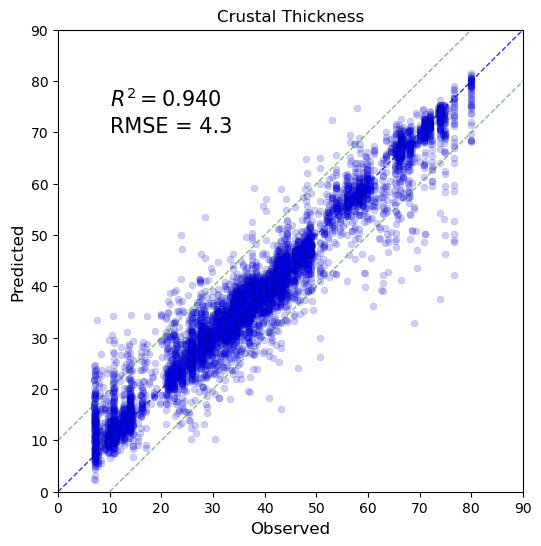

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error as root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from catboost import CatBoostRegressor

# Assuming x and y are your features and target variable, respectively
# Define your data x and y here

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Best hyperparameters for CatBoost
best_params = {'depth': 8, 'iterations': 1400, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

# Initialize CatBoostRegressor with the best hyperparameters
best_regr = CatBoostRegressor(**best_params, verbose=0)

# Perform cross-validation with the best model
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_predict = np.zeros_like(y)

for train_index, test_index in kf.split(x_scaled):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_regr.fit(x_train, y_train.ravel(), eval_set=(x_test, y_test), early_stopping_rounds=50)
    y_predict[test_index] = best_regr.predict(x_test)

# Evaluate the model
r2_test = r2_score(y, y_predict)
RMSE = mean_squared_error(y, y_predict, squared=False)

# Plot results
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y, y_predict, 25, color='blue', edgecolors='black', alpha=0.2, linewidths=0.25)
ax.plot([0, 90], [0, 90], linestyle='--', lw=1, color='b', alpha=.8)
ax.plot([10, 90], [0, 80], linestyle='--', lw=1, color='g', alpha=.5)
ax.plot([0, 80], [10, 90], linestyle='--', lw=1, color='g', alpha=.5)
ax.text(10, 75, r'$R^2 = {:.3f}$'.format(r2_test), fontsize=15)
ax.text(10, 70, r'RMSE = {:.1f}'.format(RMSE), fontsize=15)
ax.set_title('Crustal Thickness')
ax.set_xlabel('Observed', fontsize=12)
ax.set_ylabel('Predicted', fontsize=12)
ax.axis([0, 90, 0, 90])
plt.savefig('JP_output_predict_catboost_final_Model1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


In [3]:
#list the feature importance and plot them in order

     Feature  Importance
11        Ce    0.074819
45  (La/Yb)n    0.268879
16        Gd    0.310085
13        Nd    0.337176
15        Eu    0.378210
37        Ni    0.403555
14        Sm    0.432341
20        Er    0.471648
5        MgO    0.479862
22        Yb    0.489789
12        Pr    0.526994
18        Dy    0.556367
42     Ba/Sc    0.564408
40      La/Y    0.615409
17        Tb    0.622560
55      Ce/Y    0.632015
10        La    0.662904
50     Sm/Yb    0.677133
35        Sc    0.679239
38        Cr    0.755753
39         A    0.787623
62     Ni/Sc    0.796821
32         U    0.813322
9       P2O5    0.852528
28        Hf    0.852864
51     Zr/Sm    0.889479
47      Zr/Y    0.908527
6        CaO    0.938062
31        Th    0.946755
21        Tm    0.947964
59      Ba/V    0.949977
34        Zr    1.025480
3       FeOt    1.149307
46     Ce/Yb    1.175458
19        Ho    1.192191
60     A/CaO    1.192600
0       SiO2    1.203390
63     Cr/Sc    1.211420
64      Ni/V    1.229542


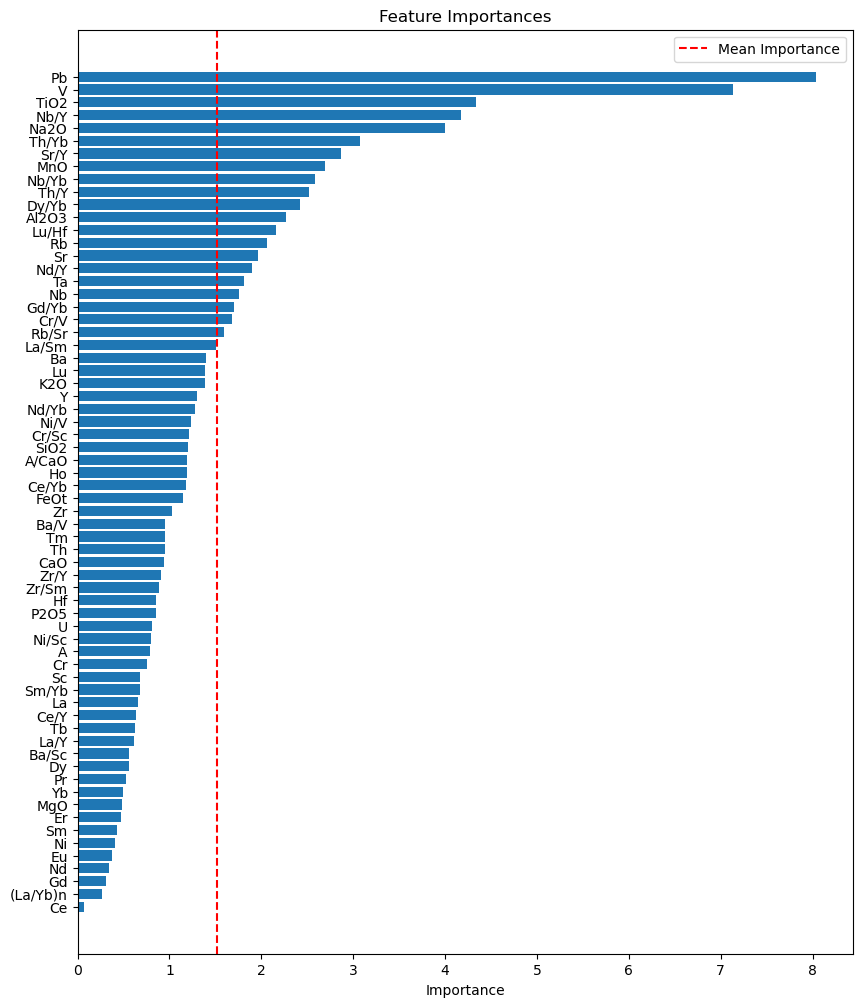

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Assuming 'best_regr', 'x_train', 'y_train', and 'columns' are already defined

# Fit the best CatBoost model
best_regr.fit(x_train, y_train.ravel(), eval_set=(x_test, y_test), early_stopping_rounds=50)

# Get feature importances
feature_importances = best_regr.get_feature_importance()

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': columns[:x_train.shape[1]],  # Ensure to use the correct number of features
    'Importance': feature_importances
})

# Sort the feature importances in ascending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Display all rows and columns when printing the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted feature importance DataFrame
print(sorted_feature_importance_df)

# Reset display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 12))
ax.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'])
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

# Calculate and plot the mean value line
mean_importance = sorted_feature_importance_df['Importance'].mean()
ax.axvline(x=mean_importance, color='r', linestyle='--', label='Mean Importance')
ax.legend()
plt.savefig('JP_list_model_catboost_Model1-1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot using Matplotlib


In [ ]:
#####Ultilizing the prediction model to predict the paleo crustal thickness (***please restart the code and exclude the LASSO analysis part***)

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

# Load the new geochemical data
new_data_path = "/Users/jianpingzhou/work/Papers/Ongoing/Appendix/Tables/Appendix Table 2-test2.csv"
new_data = pd.read_csv(new_data_path)

# Assuming 'columns' contains the feature names used in training the model
# Convert the DataFrame to a NumPy array before transformation to match the original scaler fitting
x_scaled_new = scaler.transform(new_data.values)

# Predict crustal thickness for the new data using the trained ExtraTreesRegressor model
predicted_thickness_new = best_regr.predict(x_scaled_new)

# Add the predicted values as a new column in the DataFrame
new_data['Predicted_Crustal_Thickness'] = predicted_thickness_new

# Save the updated DataFrame to a new CSV file
output_path = "/Users/jianpingzhou/work/Papers/Ongoing/Appendix/workflow/JP_crustal_thickness_prediction/dataset/output/Appendix Table 2-test2_export_Lhasa_With Georoc.csv"
new_data.to_csv(output_path, index=False)

print("Predictions added and saved to:", output_path)


Predictions added and saved to: /Users/jianpingzhou/work/Papers/Ongoing/Appendix/workflow/JP_crustal_thickness_prediction/dataset/output/Appendix Table 2-test2_export_Lhasa_With Georoc.csv


In [ ]:
#TEST1: Further analyzing the features with LASSO analysis (Lasso is straightforward but requires you to use techniques like cross-validation manually to determine the best alpha.)

Important Features:
      Feature  Coefficient
36         V    -4.108498
29        Nb    -4.077991
15        Eu    -4.055391
43     Nb/Yb    -3.789323
6        CaO    -3.631792
54     Lu/Hf    -3.386385
18        Dy    -2.825418
40      La/Y    -2.322553
37        Ni    -2.151918
24        Sr    -2.050277
31        Th    -1.984963
13        Nd    -1.797529
45  (La/Yb)n    -1.728172
28        Hf    -1.268560
22        Yb    -0.860473
51     Zr/Sm    -0.747173
4        MnO    -0.702443
16        Gd    -0.594223
57     Th/Yb    -0.413888
42     Ba/Sc    -0.399066
63     Cr/Sc    -0.310128
59      Ba/V    -0.229380
64      Ni/V    -0.194028
21        Tm    -0.137606
38        Cr    -0.118276
20        Er    -0.112827
30        Ta     0.030539
56      Nd/Y     0.069728
61      Th/Y     0.226795
47      Zr/Y     0.236997
55      Ce/Y     0.245966
65      Cr/V     0.306080
1       TiO2     0.352095
60     A/CaO     0.517503
58     Gd/Yb     0.526685
25         Y     0.529994
32         U     

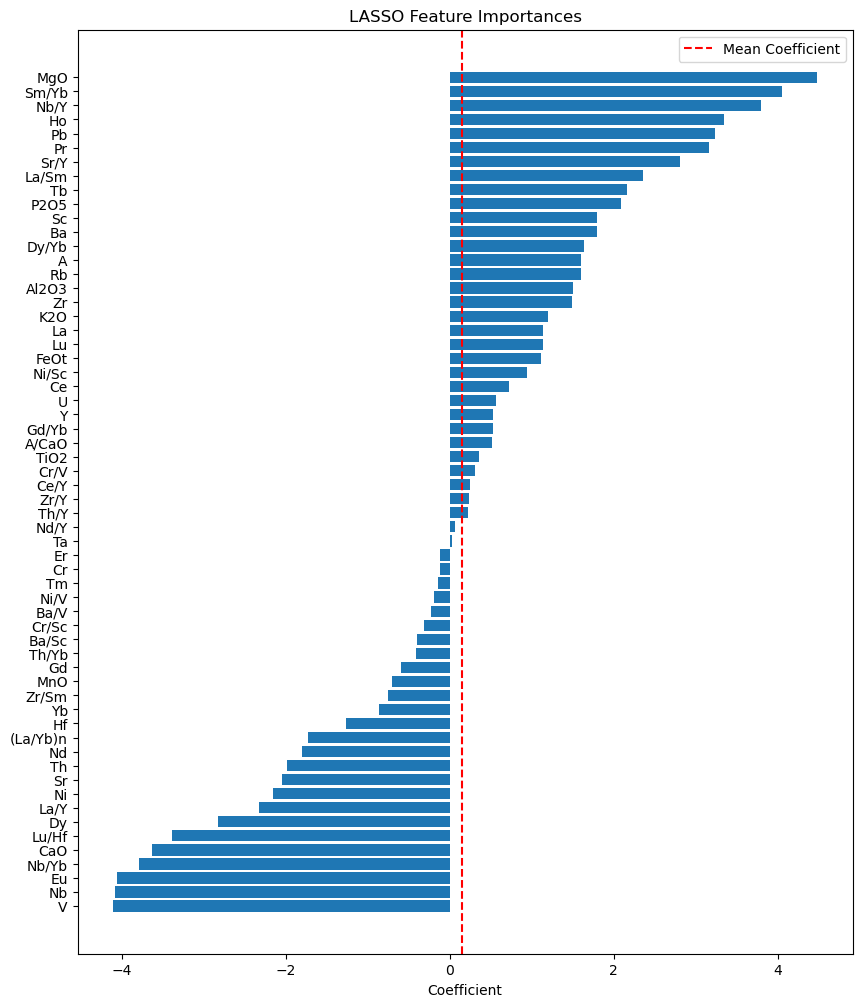

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'x_train', 'y_train', and 'columns' are already defined

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[:, :66])

# Fit the LASSO model with increased iterations
lasso = Lasso(alpha=0.01, max_iter=100000)  # Increase max_iter to allow more iterations
lasso.fit(x_train_scaled, y_train.ravel())

# Check if the model converged
if not lasso.n_iter_ < lasso.max_iter:
    print(f"Lasso did not converge. Consider increasing max_iter beyond {lasso.max_iter}.")

# Get the coefficients from the LASSO model
lasso_coefficients = lasso.coef_

# Create a DataFrame with feature names and coefficients
feature_importance_df = pd.DataFrame({
    'Feature': columns[:66],
    'Coefficient': lasso_coefficients
})

# Filter out features with zero coefficient
important_features_df = feature_importance_df[feature_importance_df['Coefficient'] != 0]

# Identify excluded features (features with zero coefficient)
excluded_features_df = feature_importance_df[feature_importance_df['Coefficient'] == 0]

# Sort the important feature importances in ascending order
sorted_important_features_df = important_features_df.sort_values(by='Coefficient', ascending=True)

# Display all rows and columns when printing the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sorted important features DataFrame
print("Important Features:\n", sorted_important_features_df)
print("\nExcluded Features:\n", excluded_features_df)

# Reset display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# Plot the important features
fig, ax = plt.subplots(figsize=(10, 12))
ax.barh(sorted_important_features_df['Feature'], sorted_important_features_df['Coefficient'])
ax.set_xlabel('Coefficient')
ax.set_title('LASSO Feature Importances')

# Calculate and plot the mean value line
mean_coefficient = sorted_important_features_df['Coefficient'].mean()
ax.axvline(x=mean_coefficient, color='r', linestyle='--', label='Mean Coefficient')
ax.legend()
plt.savefig('JP_feature_list_lasso_Model1-1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot using Matplotlib


Excluded Features:
 ['SiO2' 'Na2O' 'Sm' 'Ce/Yb' 'Rb/Sr' 'Nd/Yb']


/Users/jianpingzhou/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


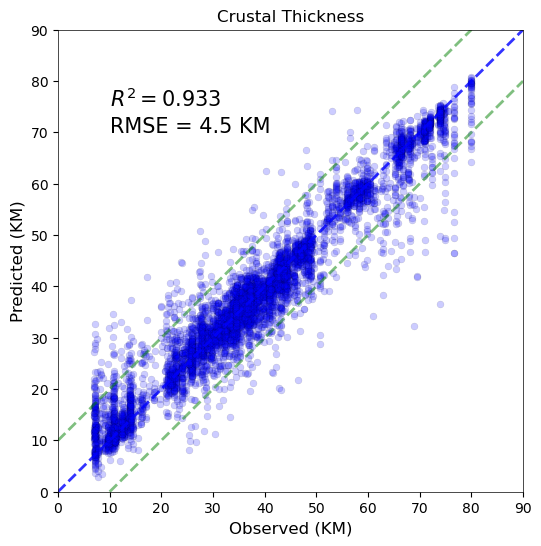

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'x_train', 'y_train', and 'columns' are already defined

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[:, :66])

# Fit the LASSO model
lasso = Lasso(alpha=0.01, max_iter=10000)  # alpha is the regularization parameter; you might need to tune this
lasso.fit(x_train_scaled, y_train.ravel())

# Get the coefficients from the LASSO model
lasso_coefficients = lasso.coef_

# Filter out features with zero coefficient
important_features_indices = np.where(lasso_coefficients != 0)[0]
x_important = x_train_scaled[:, important_features_indices]

# Identify excluded features (features with zero coefficient)
excluded_features_indices = np.where(lasso_coefficients == 0)[0]
excluded_features = np.array(columns)[:66][excluded_features_indices]

# Check if any features were excluded
if len(excluded_features_indices) > 0:
    print("Excluded Features:\n", excluded_features)
else:
    print("All features were included.")

# Train CatBoost Regressor using the important features
kf10 = KFold(n_splits=10, shuffle=True)
regr = CatBoostRegressor(iterations=1400, depth=8, learning_rate=0.1, l2_leaf_reg=5, verbose=0)
y_predict = np.zeros(y_train.size)

for train_index, test_index in kf10.split(x_important):
    x_train_kf, x_test_kf = x_important[train_index], x_important[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    regr.fit(x_train_kf, y_train_kf.ravel(), eval_set=(x_test_kf, y_test_kf), early_stopping_rounds=50)
    y_predict[test_index] = regr.predict(x_test_kf)

# Calculate performance metrics
r2_test = r2_score(y_train, y_predict)
RMSE = mean_squared_error(y_train, y_predict, squared=False)

# Plot scatter plot of prediction results
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train, y_predict, 25, color='blue', edgecolors='black', alpha=0.2, linewidths=0.25)
ax.plot([0, 90], [0, 90], linestyle='--', lw=2, color='b', alpha=.8)
ax.plot([10, 90], [0, 80], linestyle='--', lw=2, color='g', alpha=.5)
ax.plot([0, 80], [10, 90], linestyle='--', lw=2, color='g', alpha=.5)
ax.text(10, 75, r'$R^2 = {:.3f}$'.format(r2_test), fontsize=15)
ax.text(10, 70, r'RMSE = {:.1f} KM'.format(RMSE), fontsize=15)
ax.set_title('Crustal Thickness')
ax.set_xlabel('Observed (KM)', fontsize=12)
ax.set_ylabel('Predicted (KM)', fontsize=12)
ax.axis([0, 90, 0, 90])
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
plt.savefig('JP_catboost_lasso_model1-1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#TEST2: LassoCV simplifies the process of finding the best regularization parameter, making it more convenient and often more robust than manually tuning alpha.

In [ ]:
#Making new predictions with LASSO CV

Important Features:
 ['MnO' 'MgO' 'CaO' 'P2O5' 'Lu' 'Sr' 'Y' 'Rb' 'Ba' 'Nb' 'Pb' 'V' 'A' 'Sr/Y'
 'Zr/Y' 'La/Sm' 'Dy/Yb' 'Sm/Yb' 'Rb/Sr' 'Lu/Hf' 'Nd/Y' 'Ba/V']

Excluded Features:
 ['SiO2' 'TiO2' 'Al2O3' 'FeOt' 'Na2O' 'K2O' 'La' 'Ce' 'Pr' 'Nd' 'Sm' 'Eu'
 'Gd' 'Tb' 'Dy' 'Ho' 'Er' 'Tm' 'Yb' 'Hf' 'Ta' 'Th' 'U' 'Zr' 'Sc' 'Ni' 'Cr'
 'La/Y' 'Nb/Y' 'Ba/Sc' 'Nb/Yb' '(La/Yb)n' 'Ce/Yb' 'Zr/Sm' 'Nd/Yb' 'Ce/Y'
 'Th/Yb' 'Gd/Yb' 'A/CaO' 'Th/Y' 'Ni/Sc' 'Cr/Sc' 'Ni/V' 'Cr/V']


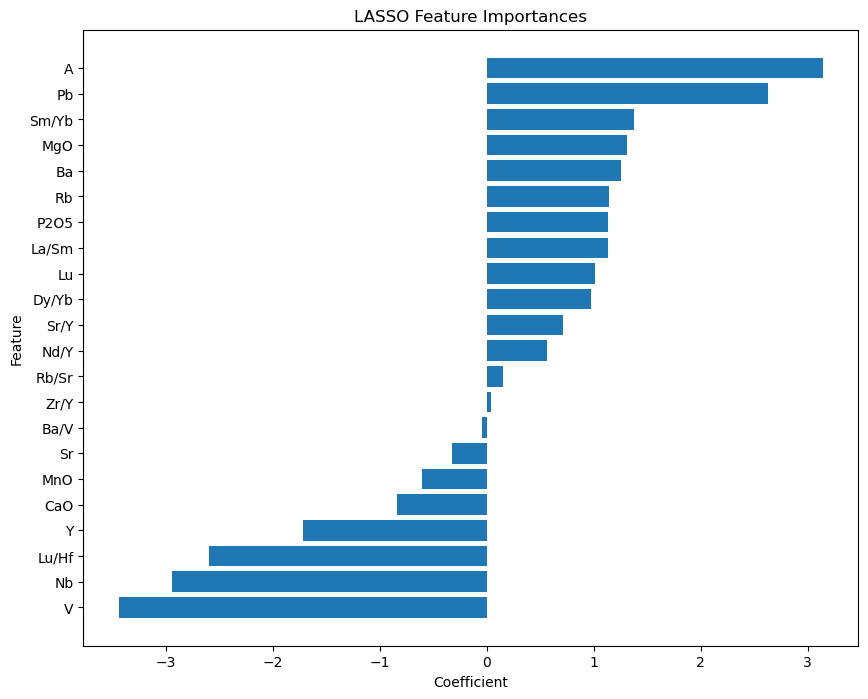

/Users/jianpingzhou/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


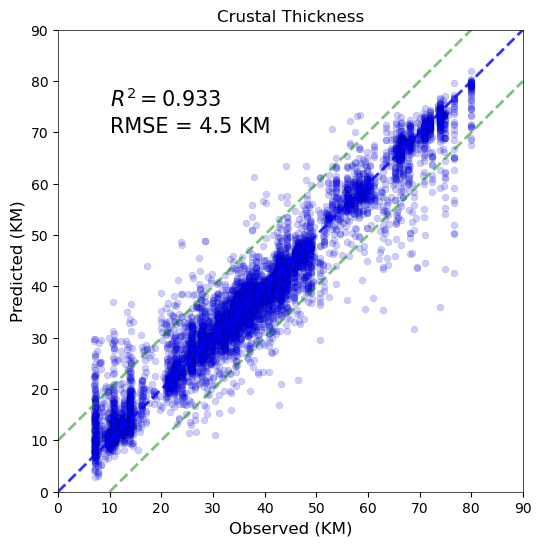

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assume x, y, and columns are your input features and target variable

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Use LassoCV to select the best alpha
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000)
lasso_cv.fit(x_scaled, y.ravel())

# Extract features with non-zero coefficients
lasso_coef = lasso_cv.coef_
important_features = np.where(lasso_coef != 0)[0]
excluded_features = np.where(lasso_coef == 0)[0]

# Get feature names
feature_names = np.array(columns)
# Update feature names to reflect the non-zero coefficients
important_feature_names = feature_names[important_features]
excluded_feature_names = feature_names[excluded_features]

# Output important and excluded features
print("Important Features:\n", important_feature_names)
print("\nExcluded Features:\n", excluded_feature_names)

# Create DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names[important_features],  # Only include important features
    'Coefficient': lasso_coef[important_features]
}).sort_values(by='Coefficient', ascending=True)

# Visualize LASSO coefficient plot
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('LASSO Feature Importances')
plt.savefig('JP_lasso_cv_feature_list_model1-1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Train CatBoost Regressor using the important features
x_important = x_scaled[:, important_features]
kf10 = KFold(n_splits=10, shuffle=True)
regr = CatBoostRegressor(iterations=1400, depth=8, learning_rate=0.1, l2_leaf_reg=5, verbose=0)
y_predict = np.zeros(y.size)

for train_index, test_index in kf10.split(x_important):
    x_train, x_test = x_important[train_index], x_important[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(x_train, y_train.ravel(), eval_set=(x_test, y_test), early_stopping_rounds=50)
    y_predict[test_index] = regr.predict(x_test)

# Calculate performance metrics
r2_test = r2_score(y, y_predict)
RMSE = mean_squared_error(y, y_predict, squared=False)

# Plot scatter plot of prediction results
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y, y_predict, 25, color='blue', edgecolors='black', alpha=0.2, linewidths=0.25)
ax.plot([0, 90], [0, 90], linestyle='--', lw=2, color='b', alpha=.8)
ax.plot([10, 90], [0, 80], linestyle='--', lw=2, color='g', alpha=.5)
ax.plot([0, 80], [10, 90], linestyle='--', lw=2, color='g', alpha=.5)
ax.text(10, 75, r'$R^2 = {:.3f}$'.format(r2_test), fontsize=15)
ax.text(10, 70, r'RMSE = {:.1f} KM'.format(RMSE), fontsize=15)
ax.set_title('Crustal Thickness')
ax.set_xlabel('Observed (KM)', fontsize=12)
ax.set_ylabel('Predicted (KM)', fontsize=12)
ax.axis([0, 90, 0, 90])
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
plt.savefig('JP_catboost_cv_prediction_model1-1.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


Finding best parameters for Random Forest...


/Users/jianpingzhou/anaconda3/envs/py39/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters for Random Forest: {'n_estimators': 1000}
Finding best parameters for Extra Trees...


/Users/jianpingzhou/anaconda3/envs/py39/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters for Extra Trees: {'max_features': 'sqrt', 'n_estimators': 700}
Finding best parameters for XGBoost...
Best Hyperparameters for XGBoost: {'n_estimators': 1000}
Using preset iterations for CatBoost: 1400
Finding best parameters for Gradient Boosting...
Best Hyperparameters for Gradient Boosting: {'n_estimators': 1500}
Finding best parameters for AdaBoost...
Best Hyperparameters for AdaBoost: {'n_estimators': 300}


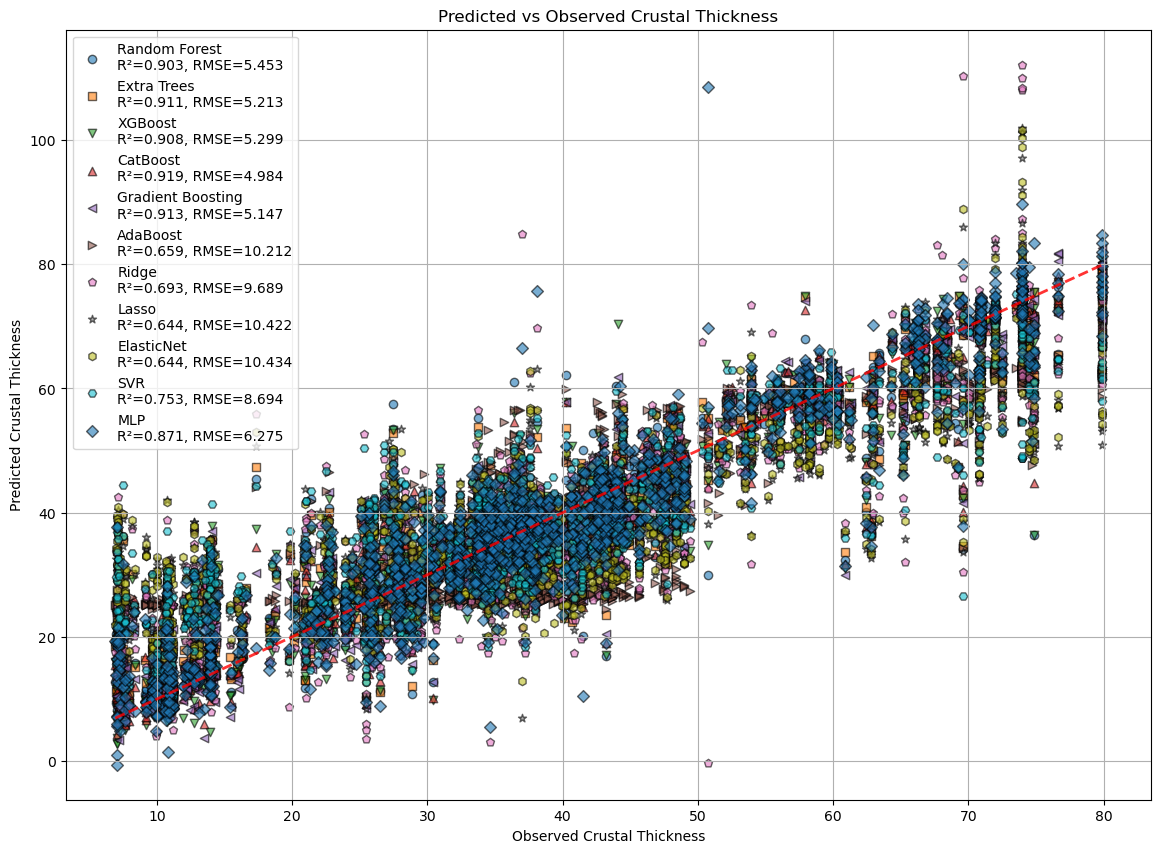

Random Forest: R² = 0.903, RMSE = 5.453
Extra Trees: R² = 0.911, RMSE = 5.213
XGBoost: R² = 0.908, RMSE = 5.299
CatBoost: R² = 0.919, RMSE = 4.984
Gradient Boosting: R² = 0.913, RMSE = 5.147
AdaBoost: R² = 0.659, RMSE = 10.212
Ridge: R² = 0.693, RMSE = 9.689
Lasso: R² = 0.644, RMSE = 10.422
ElasticNet: R² = 0.644, RMSE = 10.434
SVR: R² = 0.753, RMSE = 8.694
MLP: R² = 0.871, RMSE = 6.275


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load the dataset
data_file = '/Users/jianpingzhou/work/Papers/Ongoing/Appendix/Data for publications/Models for machine learning/Model 1.csv'
data = pd.read_csv(data_file)

# Extract features (X) and target variable (y)
X, y = data.iloc[:, :66].values, data['Crustal_Thickness'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameter grid for n_estimators
n_estimators_grid = [300, 500, 700, 1000, 1500]

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(iterations=1400, random_seed=42, verbose=0),  # Set iterations to 1400
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

# Parameter grids for each model
param_grids = {
    'Random Forest': {'n_estimators': n_estimators_grid},
    'Extra Trees': {'n_estimators': n_estimators_grid, 'max_features': ['sqrt', 'log2']},
    'XGBoost': {'n_estimators': n_estimators_grid},
    'Gradient Boosting': {'n_estimators': n_estimators_grid},
    'AdaBoost': {'n_estimators': n_estimators_grid}
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best n_estimators for each model
best_models = {}
for name, model in models.items():
    if name == 'CatBoost':  # Skip grid search for CatBoost
        best_models[name] = model
        print(f"Using preset iterations for {name}: 1400")
    else:
        print(f"Finding best parameters for {name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")

# Define other models that do not use n_estimators
other_models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'MLP': MLPRegressor(max_iter=500, random_state=42)  # Increase max_iter for MLP
}

# Combine all models
all_models = {**best_models, **other_models}

# Define different markers for each model
markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', 'h', 'H', 'D', 'd']

# Train and predict with each model
predictions = {}
for name, model in all_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Calculate R² and RMSE for each model
metrics = {}
for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    metrics[name] = {'R²': r2, 'RMSE': rmse}

# Plot predicted vs observed for each model with R² and RMSE values
plt.figure(figsize=(14, 10))
for i, (name, y_pred) in enumerate(predictions.items()):
    r2 = metrics[name]['R²']
    rmse = metrics[name]['RMSE']
    label = f'{name}\nR²={r2:.3f}, RMSE={rmse:.3f}'
    plt.scatter(y_test, y_pred, label=label, alpha=0.6, marker=markers[i % len(markers)], edgecolors='k')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', lw=2, color='r', alpha=0.8)
plt.title('Predicted vs Observed Crustal Thickness')
plt.xlabel('Observed Crustal Thickness')
plt.ylabel('Predicted Crustal Thickness')
plt.legend()
plt.grid(True)
plt.savefig('JP_Model1_Comparison1-3.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print R² and RMSE for each model
for name, metric in metrics.items():
    print(f'{name}: R² = {metric["R²"]:.3f}, RMSE = {metric["RMSE"]:.3f}')
